In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
# warnings.filterwarnings('ignore')

In [17]:
# Set plotting style
# plt.style.use('seaborn-v0_8')
# sns.set_palette("husl")

# Load the dataset
df = pd.read_csv("/Users/phuonguyennguyen/Documents/Programming languages/EDA_heart/data/Heart_disease_cleveland_new.csv")

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [59]:
#find missing values 
missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    print(missing_data[missing_data > 0])
else:
    print("No missing values found!")

Series([], dtype: int64)


In [62]:
#check for duplicates    
duplicates = df.duplicated().sum()
if duplicates.sum() > 0:
    print(f"{duplicates} duplicate rows found")
else:
    print("No duplicated values found!")

No duplicated values found!


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #create visualization in the line

Text(0.5, 0, 'Age')

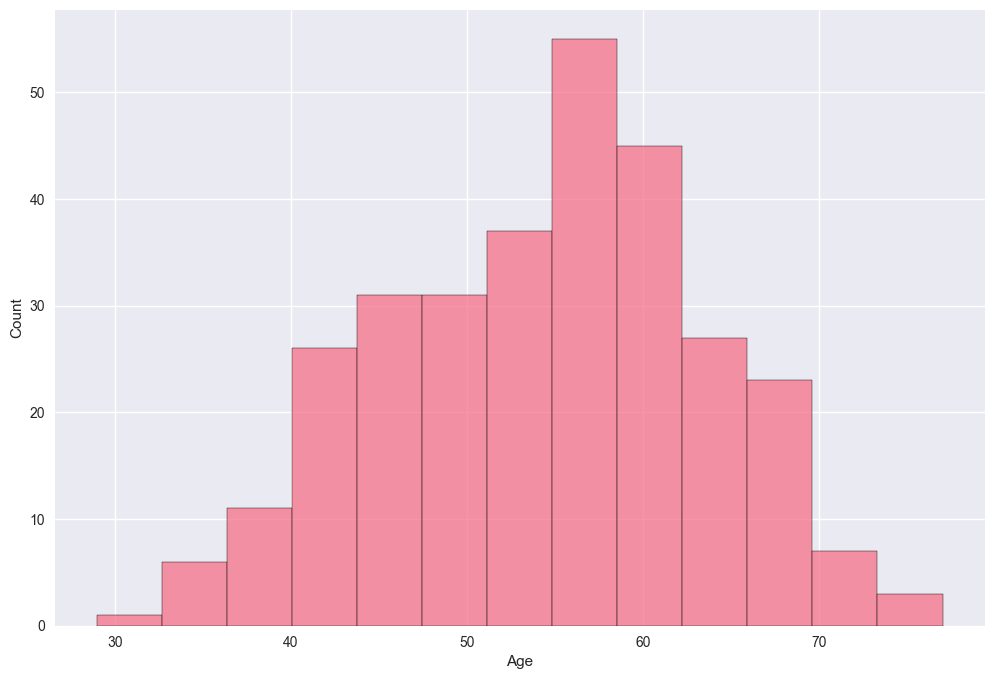

In [54]:
sns.histplot(df['age'].dropna())
plt.xlabel('Age')

Text(1, 141, '139')

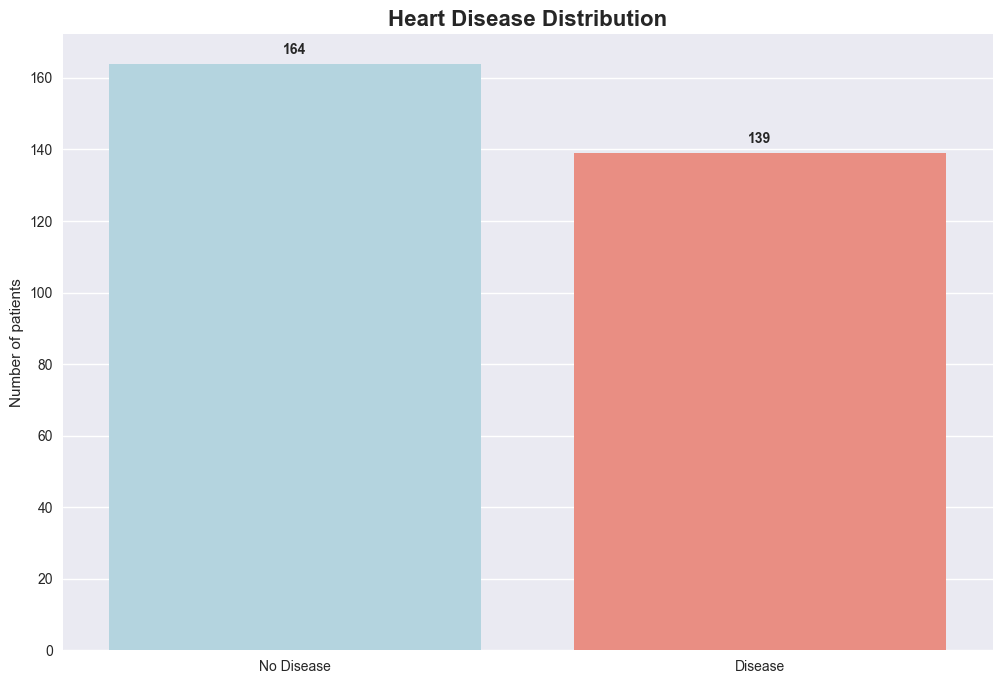

In [56]:
### HEART DISEASE DISTRIBUTION ####

#calculate # of patients who has heart disease and who don't
no_disease = (df['target']==0).sum()
with_disease = (df['target']==1).sum()

#create bar chart
ax = sns.countplot(data=df, x='target', palette = ['lightblue', 'salmon'])

#add labels and titles
plt.xlabel('')
plt.ylabel('Number of patients')
plt.title('Heart Disease Distribution', fontweight = 'bold', fontsize = 16)
plt.xticks([0, 1], ['No Disease', 'Disease'])

#add # of patients who has heart disease and who don't on top of the bar 
ax.text(0, no_disease + 2, f'{no_disease}', ha='center', va='bottom', fontweight='bold')
ax.text(1, with_disease + 2, f'{with_disease}', ha='center', va='bottom', fontweight='bold')

Text(0.5, 1.0, 'Heart Disease Distribution')

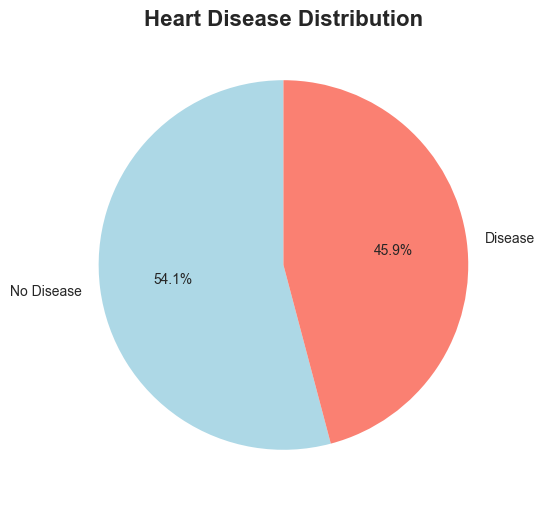

In [68]:
   # Pie chart
counts = [no_disease, with_disease]
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', colors = ['lightblue','salmon'], startangle = 90)
plt.title('Heart Disease Distribution', fontweight='bold', fontsize = 16)

In [20]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nColumn Names:")
print(df.columns.tolist())

# Data types
print("Data Types:")
print(df.dtypes)

# Check for mixed data types
for col in df.columns:
    unique_types = df[col].apply(type).unique()
    if len(unique_types) > 1:
        print(f"Mixed types in {col}: {unique_types}")


# Heart Disease Dataset - Comprehensive EDA
# Resume-worthy analysis with clinical insights

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load your dataset (replace with your file path)
# df = pd.read_csv("your_heart_disease_dataset.csv")

print("=== HEART DISEASE DATASET - COMPREHENSIVE EDA ===\n")

# ============================================================================
# PHASE 1: DATA UNDERSTANDING & QUALITY ASSESSMENT
# ============================================================================

print("1. DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Data quality check
print("\n2. DATA QUALITY ASSESSMENT")
print("=" * 50)
print("Missing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No missing values found ✓")

print("\nDuplicate Rows:")
duplicates = df.duplicated().sum()
print(f"{duplicates} duplicate rows found" if duplicates > 0 else "No duplicates found ✓")

print("\nData Types:")
print(df.dtypes.value_counts())

# ============================================================================
# PHASE 2: FEATURE UNDERSTANDING (CLINICAL CONTEXT)
# ============================================================================

print("\n3. CLINICAL FEATURE DEFINITIONS")
print("=" * 50)

# Define what each feature means clinically
feature_definitions = {
    'age': 'Patient age in years',
    'sex': 'Gender (1 = male, 0 = female)',
    'cp': 'Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)',
    'trestbps': 'Resting blood pressure (mm Hg)',
    'chol': 'Serum cholesterol (mg/dl)',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)',
    'restecg': 'Resting ECG results (0: normal, 1: ST-T abnormality, 2: LV hypertrophy)',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina (1 = yes, 0 = no)',
    'oldpeak': 'ST depression induced by exercise relative to rest',
    'slope': 'Slope of peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping)',
    'ca': 'Number of major vessels colored by fluoroscopy (0-3)',
    'thal': 'Thalassemia (1: normal, 2: fixed defect, 3: reversible defect)',
    'target': 'Heart disease presence (1 = disease, 0 = no disease)'
}

for feature, definition in feature_definitions.items():
    print(f"{feature:10}: {definition}")

# ============================================================================
# PHASE 3: DESCRIPTIVE STATISTICS
# ============================================================================

print("\n4. DESCRIPTIVE STATISTICS")
print("=" * 50)

# Separate numerical and categorical variables
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

print("NUMERICAL VARIABLES:")
print(df[numerical_vars].describe().round(2))

print("\nCATEGORICAL VARIABLES:")
for var in categorical_vars:
    print(f"\n{var}:")
    print(df[var].value_counts().sort_index())

# ============================================================================
# PHASE 4: TARGET VARIABLE ANALYSIS
# ============================================================================

print("\n5. TARGET VARIABLE ANALYSIS")
print("=" * 50)

# Heart disease distribution
target_counts = df['target'].value_counts()
target_pct = df['target'].value_counts(normalize=True) * 100

print("Heart Disease Distribution:")
print(f"No Disease (0): {target_counts[0]} patients ({target_pct[0]:.1f}%)")
print(f"Disease (1):    {target_counts[1]} patients ({target_pct[1]:.1f}%)")

# ============================================================================
# PHASE 5: VISUALIZATION FUNCTIONS
# ============================================================================

def create_target_distribution_plot():
    """Create target variable distribution visualization"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Count plot
    target_counts = df['target'].value_counts()
    ax1.bar(['No Disease', 'Heart Disease'], target_counts.values, 
            color=['lightblue', 'salmon'], alpha=0.8)
    ax1.set_title('Heart Disease Distribution', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Number of Patients')
    
    # Add value labels on bars
    for i, v in enumerate(target_counts.values):
        ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')
    
    # Pie chart
    ax2.pie(target_counts.values, labels=['No Disease', 'Heart Disease'], 
            autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90)
    ax2.set_title('Heart Disease Percentage', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def create_demographic_analysis():
    """Analyze demographics vs heart disease"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Age distribution by target
    sns.histplot(data=df, x='age', hue='target', bins=20, alpha=0.7, ax=axes[0,0])
    axes[0,0].set_title('Age Distribution by Heart Disease Status')
    axes[0,0].legend(['No Disease', 'Heart Disease'])
    
    # Gender distribution by target
    gender_target = pd.crosstab(df['sex'], df['target'], normalize='index') * 100
    gender_target.plot(kind='bar', ax=axes[0,1], color=['lightblue', 'salmon'])
    axes[0,1].set_title('Heart Disease Rate by Gender')
    axes[0,1].set_xlabel('Gender (0=Female, 1=Male)')
    axes[0,1].set_ylabel('Percentage')
    axes[0,1].legend(['No Disease', 'Heart Disease'])
    axes[0,1].tick_params(axis='x', rotation=0)
    
    # Age boxplot by target
    sns.boxplot(data=df, x='target', y='age', ax=axes[1,0])
    axes[1,0].set_title('Age Distribution by Heart Disease Status')
    axes[1,0].set_xlabel('Heart Disease (0=No, 1=Yes)')
    
    # Chest pain type distribution
    cp_target = pd.crosstab(df['cp'], df['target'], normalize='index') * 100
    cp_target.plot(kind='bar', ax=axes[1,1], color=['lightblue', 'salmon'])
    axes[1,1].set_title('Heart Disease Rate by Chest Pain Type')
    axes[1,1].set_xlabel('Chest Pain Type')
    axes[1,1].set_ylabel('Percentage')
    axes[1,1].legend(['No Disease', 'Heart Disease'])
    axes[1,1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()

def create_clinical_parameters_analysis():
    """Analyze key clinical parameters"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    clinical_vars = ['trestbps', 'chol', 'thalach', 'oldpeak']
    
    for i, var in enumerate(clinical_vars):
        row = i // 2
        col = i % 2
        
        # Boxplot
        sns.boxplot(data=df, x='target', y=var, ax=axes[row, col])
        axes[row, col].set_title(f'{var} by Heart Disease Status')
        axes[row, col].set_xlabel('Heart Disease (0=No, 1=Yes)')
    
    # Exercise induced angina
    exang_target = pd.crosstab(df['exang'], df['target'], normalize='index') * 100
    exang_target.plot(kind='bar', ax=axes[1,2], color=['lightblue', 'salmon'])
    axes[1,2].set_title('Heart Disease Rate by Exercise Induced Angina')
    axes[1,2].set_xlabel('Exercise Induced Angina (0=No, 1=Yes)')
    axes[1,2].set_ylabel('Percentage')
    axes[1,2].legend(['No Disease', 'Heart Disease'])
    axes[1,2].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()

def create_correlation_analysis():
    """Create correlation heatmap"""
    plt.figure(figsize=(12, 10))
    
    # Calculate correlation matrix
    corr_matrix = df.corr()
    
    # Create heatmap
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    
    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print strongest correlations with target
    target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
    print("\nStrongest correlations with Heart Disease:")
    print("=" * 45)
    for feature, corr in target_corr.items():
        if feature != 'target':
            print(f"{feature:12}: {corr:.3f}")

# ============================================================================
# PHASE 6: STATISTICAL ANALYSIS
# ============================================================================

def perform_statistical_tests():
    """Perform statistical tests for key findings"""
    print("\n6. STATISTICAL SIGNIFICANCE TESTS")
    print("=" * 50)
    
    # Test 1: Age difference between groups
    no_disease = df[df['target'] == 0]['age']
    disease = df[df['target'] == 1]['age']
    
    t_stat, p_value = stats.ttest_ind(no_disease, disease)
    print(f"Age difference t-test:")
    print(f"  Mean age (No disease): {no_disease.mean():.1f} years")
    print(f"  Mean age (Disease): {disease.mean():.1f} years")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")
    
    # Test 2: Gender association
    from scipy.stats import chi2_contingency
    gender_crosstab = pd.crosstab(df['sex'], df['target'])
    chi2, p_value, dof, expected = chi2_contingency(gender_crosstab)
    print(f"\nGender-Disease association (Chi-square test):")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")

# ============================================================================
# PHASE 7: KEY INSIGHTS & RECOMMENDATIONS
# ============================================================================

def generate_insights():
    """Generate key clinical insights"""
    print("\n7. KEY CLINICAL INSIGHTS")
    print("=" * 50)
    
    # Calculate key statistics
    male_disease_rate = df[df['sex'] == 1]['target'].mean() * 100
    female_disease_rate = df[df['sex'] == 0]['target'].mean() * 100
    
    avg_age_disease = df[df['target'] == 1]['age'].mean()
    avg_age_no_disease = df[df['target'] == 0]['age'].mean()
    
    print("DEMOGRAPHIC RISK FACTORS:")
    print(f"• Male heart disease rate: {male_disease_rate:.1f}%")
    print(f"• Female heart disease rate: {female_disease_rate:.1f}%")
    print(f"• Average age with disease: {avg_age_disease:.1f} years")
    print(f"• Average age without disease: {avg_age_no_disease:.1f} years")
    
    print("\nCLINICAL RECOMMENDATIONS:")
    print("• Focus screening on males (higher risk)")
    print("• Implement age-based screening protocols")
    print("• Monitor chest pain symptoms carefully")
    print("• Regular cardiovascular health assessments")

# ============================================================================
# EXECUTE ANALYSIS
# ============================================================================

print("\nExecuting comprehensive EDA...")
print("Run each function below to generate visualizations and insights:")
print("\n# Generate visualizations:")
print("create_target_distribution_plot()")
print("create_demographic_analysis()")
print("create_clinical_parameters_analysis()")
print("create_correlation_analysis()")
print("\n# Statistical analysis:")
print("perform_statistical_tests()")
print("\n# Generate insights:")
print("generate_insights()")

Dataset Shape: (303, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-nul

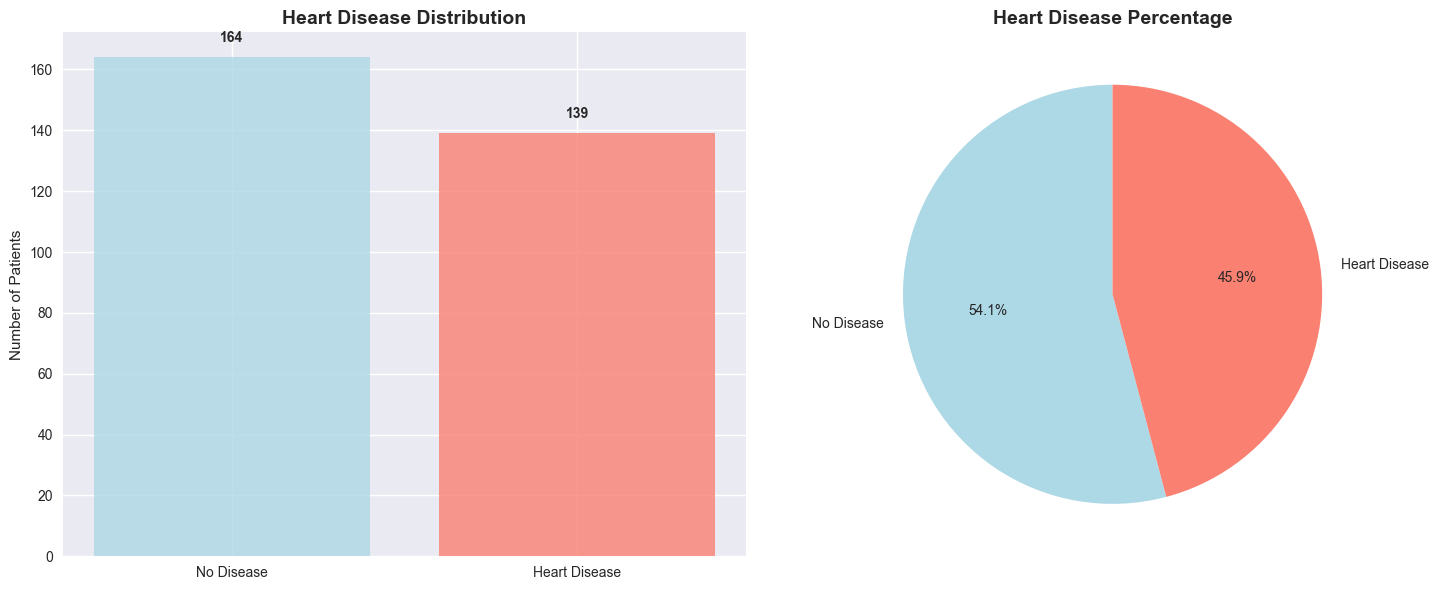

In [21]:
# Execute visualizations one by one
create_target_distribution_plot()

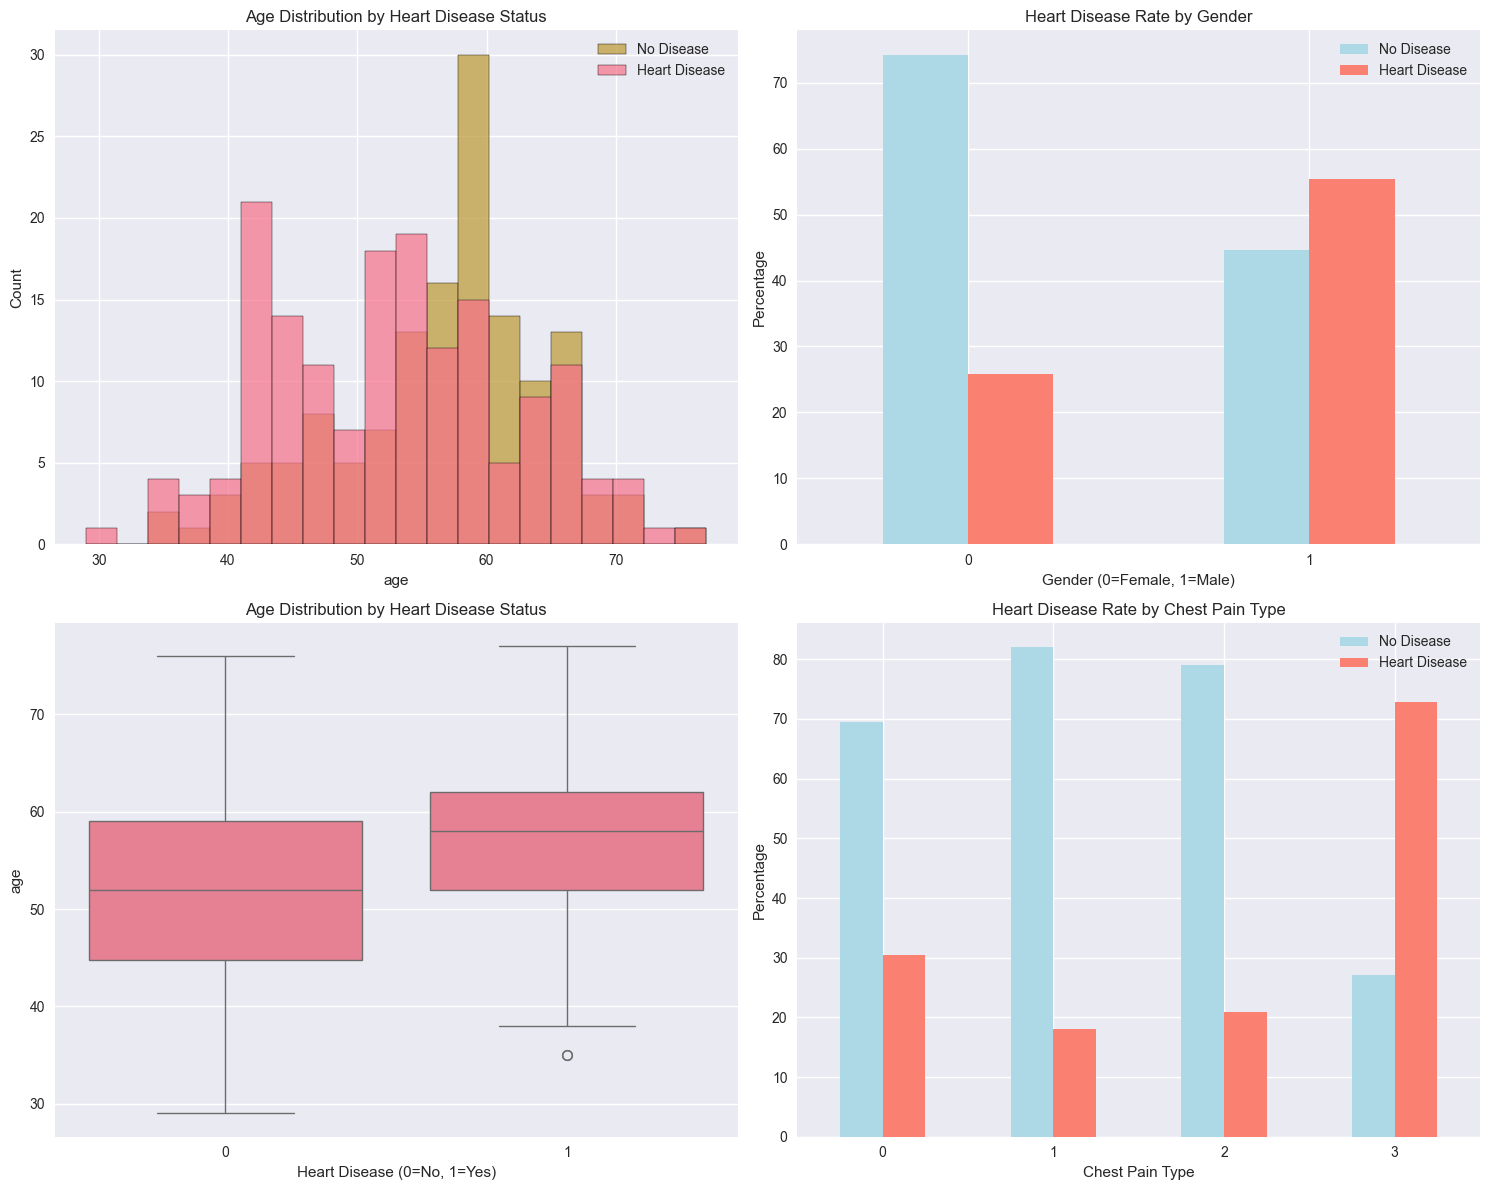

In [22]:
create_demographic_analysis()

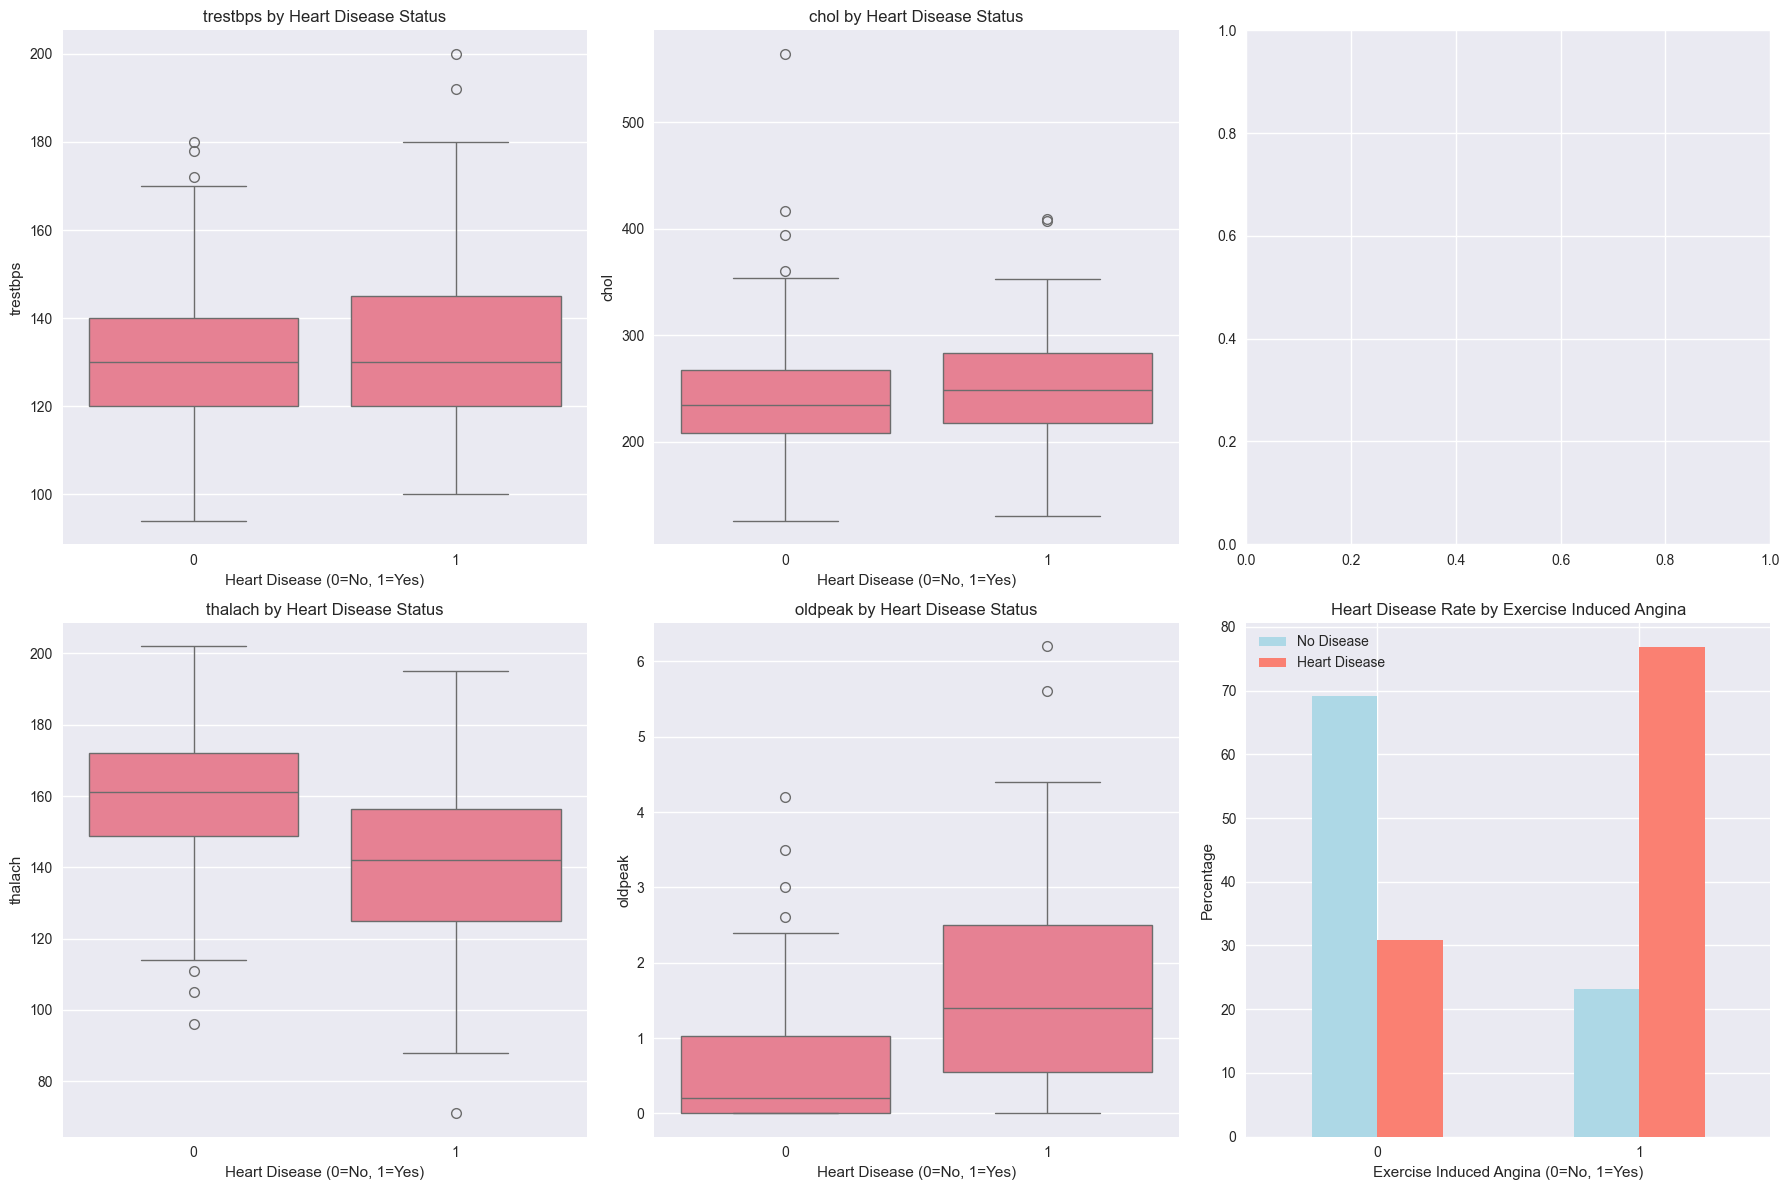

In [23]:
create_clinical_parameters_analysis()

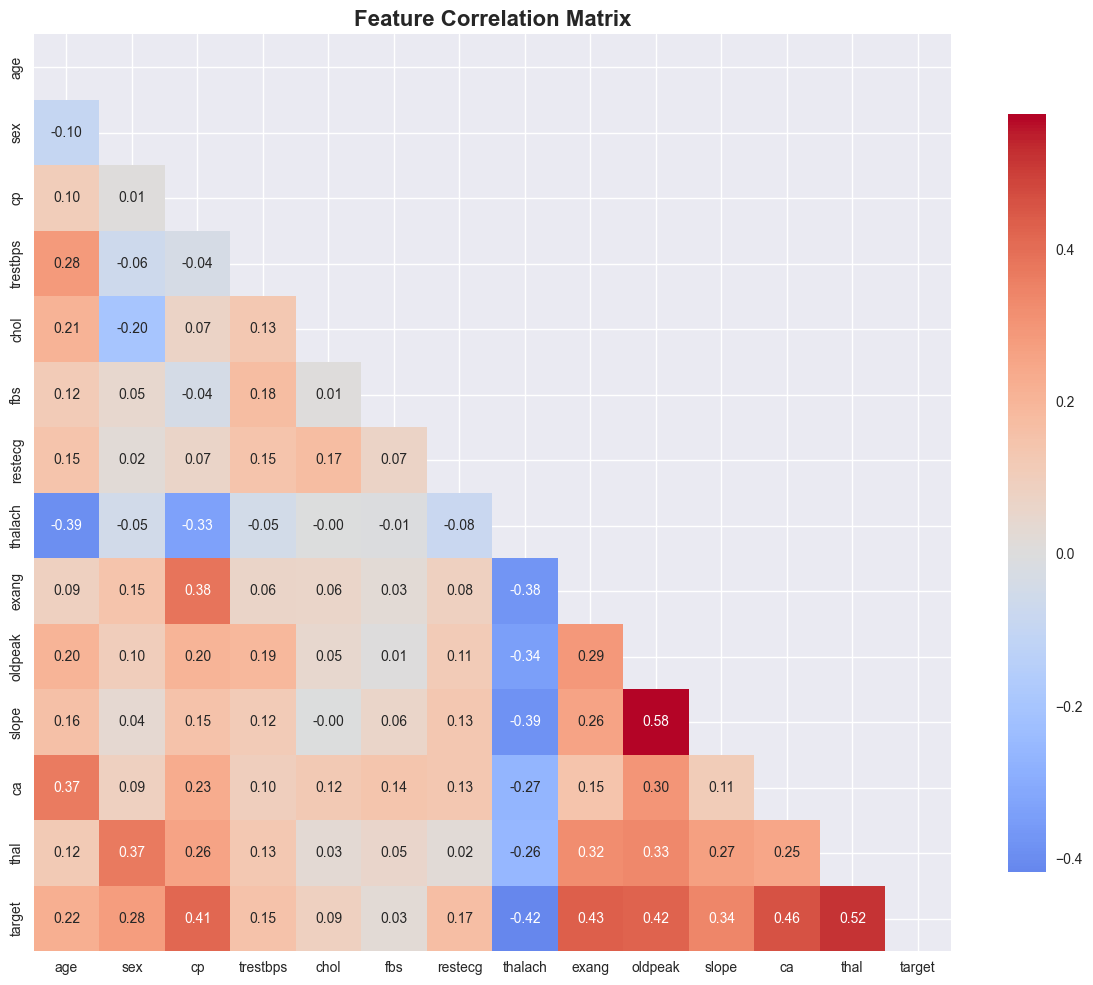


Strongest correlations with Heart Disease:
thal        : 0.516
ca          : 0.460
exang       : 0.432
oldpeak     : 0.425
thalach     : 0.417
cp          : 0.414
slope       : 0.339
sex         : 0.277
age         : 0.223
restecg     : 0.169
trestbps    : 0.151
chol        : 0.085
fbs         : 0.025


In [24]:
create_correlation_analysis()

In [25]:
# Run statistical tests
perform_statistical_tests()


6. STATISTICAL SIGNIFICANCE TESTS
Age difference t-test:
  Mean age (No disease): 52.6 years
  Mean age (Disease): 56.6 years
  p-value: 0.0001
  Significant: Yes

Gender-Disease association (Chi-square test):
  Chi-square statistic: 22.0426
  p-value: 0.0000
  Significant: Yes


In [26]:
# Generate insights
generate_insights()


7. KEY CLINICAL INSIGHTS
DEMOGRAPHIC RISK FACTORS:
• Male heart disease rate: 55.3%
• Female heart disease rate: 25.8%
• Average age with disease: 56.6 years
• Average age without disease: 52.6 years

CLINICAL RECOMMENDATIONS:
• Focus screening on males (higher risk)
• Implement age-based screening protocols
• Monitor chest pain symptoms carefully
• Regular cardiovascular health assessments
